# Heart Attack Prediction

**Importing Libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline 

In [2]:
import os
os.getcwd()

'/Users/ankushv/Desktop/DataDisca/Heart-Attack-Prediction-master/Code'

In [3]:
df = pd.read_csv('/Users/ankushv/Desktop/DataDisca/Heart-Attack-Prediction-master/Data/heart-attack.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


## Data Cleansing and Type

In [4]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


## Data Exploration

In [22]:
pip install pandas-profiling[notebook]

  Using cached jupyter_core-4.6.3-py2.py3-none-any.whl (83 kB)
  Using cached jupyter_client-6.1.7-py3-none-any.whl (108 kB)


  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.6.1
    Uninstalling jupyter-core-4.6.1:
      Successfully uninstalled jupyter-core-4.6.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.4
    Uninstalling jupyter-client-5.3.4:
      Successfully uninstalled jupyter-client-5.3.4
Note: you may need to restart the kernel to use updated packages.


In [24]:
conda install -c conda-forge pandas-profiling

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    pandas-profiling-1.4.1     |                0          39 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  pandas-profiling   an

In [9]:
import pandas_profiling

In [10]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'ProfileReport' from 'pandas_profiling' (unknown location)

In [11]:
pandas_profiling.ProfileReport(df)

AttributeError: module 'pandas_profiling' has no attribute 'ProfileReport'

## Data Visualisation

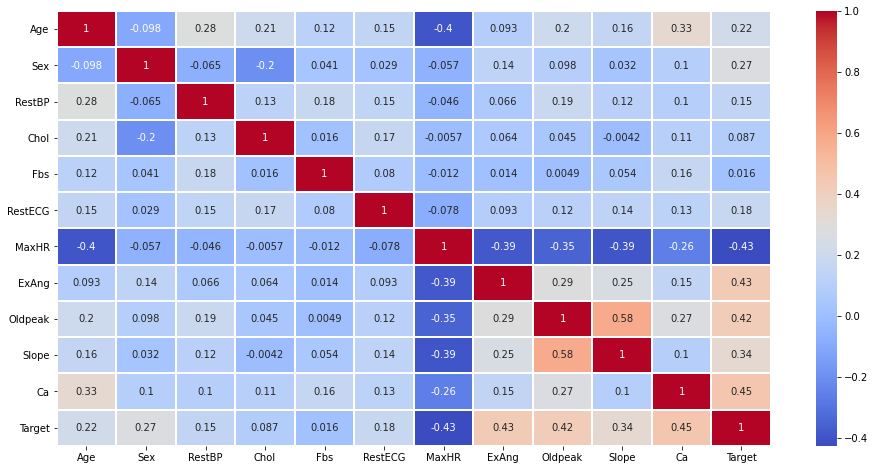

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linewidth = 1)
plt.show()

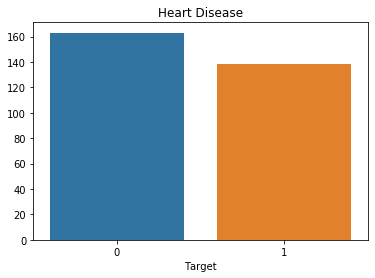

In [30]:
sns.countplot(data= df, x='Target')
plt.xlabel('Target')
plt.ylabel('')
plt.title('Heart Disease')
plt.show()

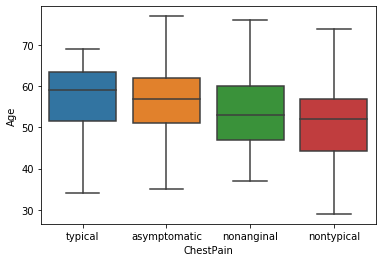

In [33]:
sns.boxplot(data=df, x='ChestPain', y='Age')
plt.show()

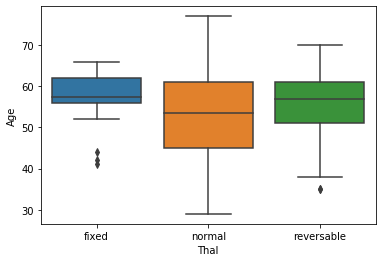

In [35]:
sns.boxplot(data=df, x='Thal', y='Age')
plt.show()